# 使用deap 求解遗传算法

## 导入所需的库

In [62]:
from deap import base, creator, tools, algorithms
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt


## 导入数据

In [63]:
Q=pd.read_excel(r"D:\adocument\数学建模\24年国赛\训练\2021年\code\data.xlsx", sheet_name='Q',header=None)
t=pd.read_excel(r"D:\adocument\数学建模\24年国赛\训练\2021年\code\data.xlsx",sheet_name='t', header=None)
Q=np.array(Q)
n_i=50
n_j=24
n=n_i*n_j

## 创建目标函数

In [64]:
creator.create('FitnessMin', base.Fitness, weights= (-1, ))
creator.create('Individual', list, fitness=creator.FitnessMin)
toolbox= base.Toolbox()

D:\soft\Miniconda\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
D:\soft\Miniconda\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


### 创建惩罚函数

In [65]:
def get_penalty_factor(generation, max_generations):
    initial_penalty = 1000
    final_penalty = 1e-2
    # 线性减少惩罚系数
    return initial_penalty - (initial_penalty - final_penalty) * (generation / max_generations)

### 初始化工具箱

In [66]:
def initIndividual():
    x= [random.randint(0,1) for _ in range(n)]
    y= [random.uniform(0, Q[i//n_j, i%n_j]) for i in range(n)]
    u= [random.randint(0,1) for _ in range(n_i)]
    return x+y+u

toolbox.register("individual", tools.initIterate,creator.Individual, initIndividual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


### 定义目标函数和约束条件

In [67]:
def evaluate(individual):
    x=np.array(individual[:n]).reshape((n_i,n_j))
    y=np.array(individual[n:2*n]).reshape((n_i,n_j))
    u=np.array(individual[2*n:]).reshape((n_i,1))
    generation = len(logbook.select("gen")) 
    max_generations = 40
    penalty_factor = get_penalty_factor(generation, max_generations)
    f=np.sum(u)

    constraint1=np.sum(np.maximum(y-Q,0))
    # if constraint1 > 0:
    #     return float('inf'),
    sumx = np.sum(x, axis=1)
    constraint2=np.sum(np.abs(u-(sumx>0).astype(int)))

    col_sum=np.sum(x*y)
    constraint3=np.sum(np.maximum(2.82e4*24-col_sum,0))
    # if constraint1 > 0:
    #     # 如果违反硬约束，直接返回一个非常大的适应度值
    #     return float('inf'),

    return f-(constraint1+constraint2+constraint3)*penalty_factor,


    


## 注册遗传操作

In [ ]:
toolbox.register('evaluate',evaluate)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', tools.mutPolynomialBounded, low=0, up=1, eta=1.0,indpb=0.2)
toolbox.register('select', tools.selTournament, tournsize=3)


population= toolbox.population(n=100)
# 运行遗传算法并记录数据
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

population,logbook =algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2,ngen=100, stats=stats, verbose=True)

Best u values: [0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1
 0 1 0 0 1 0 1 1 1 1 1 1 0]
31


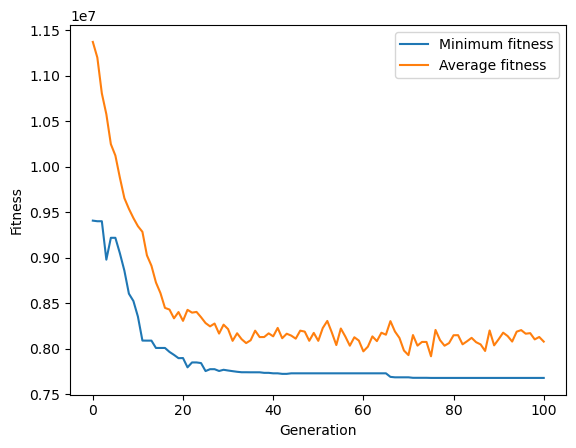

In [71]:
# 提取最优个体和适应度
best_individual = tools.selBest(population, 1)[0]
best_fitness = best_individual.fitness.values[0]
best_u=np.array(best_individual[2 * n_i * n_j:]).reshape((n_i,))
# print(f"Best individual: {best_individual}")
print(f"Best u values: {best_u}")
print(np.sum(best_u))

# 可视化适应度变化
gen = logbook.select("gen")
fit_mins = logbook.select("min")
fit_avgs = logbook.select("avg")

plt.figure()
plt.plot(gen, fit_mins, label="Minimum fitness")
plt.plot(gen, fit_avgs, label="Average fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.show()